# Identificar fronteras no lineales

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles, make_blobs
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

In [12]:
X, Y = make_circles(100, factor=.1, noise=.1)

In [23]:
def plt_svc(model,ax=None,plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Generamos la parrilla de puntos para evaluar el modelo
    xx = np.linspace(xlim[0],xlim[1],30)
    yy = np.linspace(ylim[0],ylim[1],30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P,colors = "k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])
    
    #print(model.support_vectors_)
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                  s = 300, linewidth=1,facecolor="blue")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

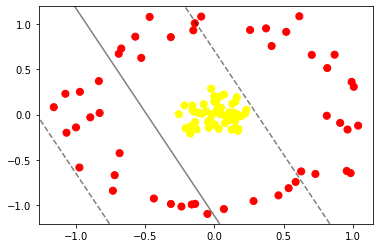

In [14]:
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X,Y),plot_support=False)

In [15]:
r = np.exp(-(X**2).sum(1))

In [16]:
r

array([0.40722809, 0.33463562, 0.99728881, 0.51102615, 0.95778282,
       0.33742569, 0.9772695 , 0.41095314, 0.95360923, 0.94537235,
       0.97387484, 0.45511595, 0.38755005, 0.97282938, 0.38189218,
       0.99403506, 0.43453382, 0.97763259, 0.98624721, 0.51672573,
       0.95984262, 0.99624522, 0.27456517, 0.95757628, 0.93854296,
       0.29971292, 0.44726006, 0.30729966, 0.96519426, 0.98541596,
       0.98212987, 0.94463046, 0.98774583, 0.98794256, 0.28812212,
       0.93573519, 0.3502092 , 0.43392416, 0.3853756 , 0.2511155 ,
       0.98391037, 0.37142098, 0.97456504, 0.3606483 , 0.97297971,
       0.2108248 , 0.97460472, 0.99206986, 0.98120368, 0.95624501,
       0.30345593, 0.39474227, 0.95153788, 0.29770198, 0.38057238,
       0.36360694, 0.24985259, 0.99795916, 0.32792047, 0.2583465 ,
       0.99162643, 0.98194554, 0.47489249, 0.93615212, 0.99882199,
       0.32984495, 0.95792081, 0.35409429, 0.35147408, 0.96984029,
       0.30668571, 0.36524908, 0.92795793, 0.27201087, 0.98184

In [17]:
def plot_3D(elev=30,azim=30,X=X,Y=Y,r=r):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=Y,s=50,cmap="autumn")
    ax.view_init(elev=elev,azim=azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")

In [18]:
interact(plot_3D, elev=[-90,-60,-30,0,30,60,90], azim=[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180],X=fixed(X),Y=fixed(Y),r=fixed(r))

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 5.87378419e-01, -7.43887381e-01],
       [ 1.03917105e+00, -1.21805516e-01],
       [ 1.74754845e-02,  4.90864616e-02],
       [-5.28181326e-01,  6.26385659e-01],
       [ 1.24595501e-01, -1.66163154e-01],
       [-2.37817433e-01, -1.01481665e+00],
       [-1.48117677e-01,  3.24649722e-02],
       [-1.52033105e-01,  9.30678260e-01],
       [-1.75493370e-01, -1.29241576e-01],
       [ 2.30843620e-01,  5.37366611e-02],
       [-1.39857947e-01, -8.31398835e-02],
       [ 6.27378157e-01, -6.27375246e-01],
       [ 5.36709307e-01, -8.12313604e-01],
       [-1.57401988e-01,  5.26419710e-02],
       [ 7.30328331e-01, -6.55162192e-01],
       [ 7.63220300e-02, -1.25596394e-02],
       [-8.34628766e-01,  3.69967990e-01],
       [-3.96932689e-02, -1.45071697e-01],
       [-1.15659377e-01,  2.17058286e-02],
       [ 8.12455812e-01, -1.25936815e-02],
       [ 3.94280016e-02,  1.98573347e-01],
       [-3.01208835e-02, -5.34282576e-02],
       

In [19]:
rbf = SVC(kernel="rbf", C = 1E6)
rbf.fit(X,Y)

SVC(C=1000000.0)

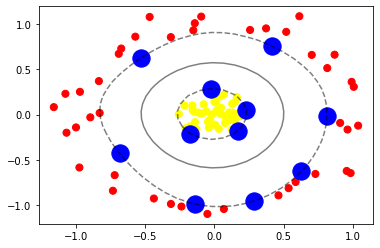

In [26]:
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
plt_svc(rbf)

## Ajustar los parámetros de SVM

In [35]:
X, Y = make_blobs(n_samples = 100, centers = 2, random_state=0, cluster_std=1.2)

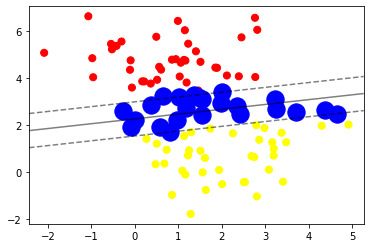

In [38]:
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
model = SVC(kernel="linear",C=10)
model.fit(X,Y)
plt_svc(model)

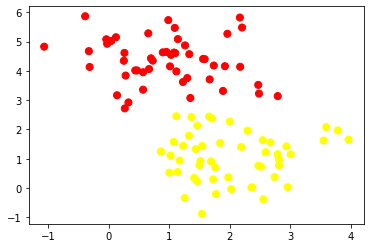

In [30]:
X, Y = make_blobs(n_samples = 100, centers = 2, random_state=0, cluster_std=0.8)
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")

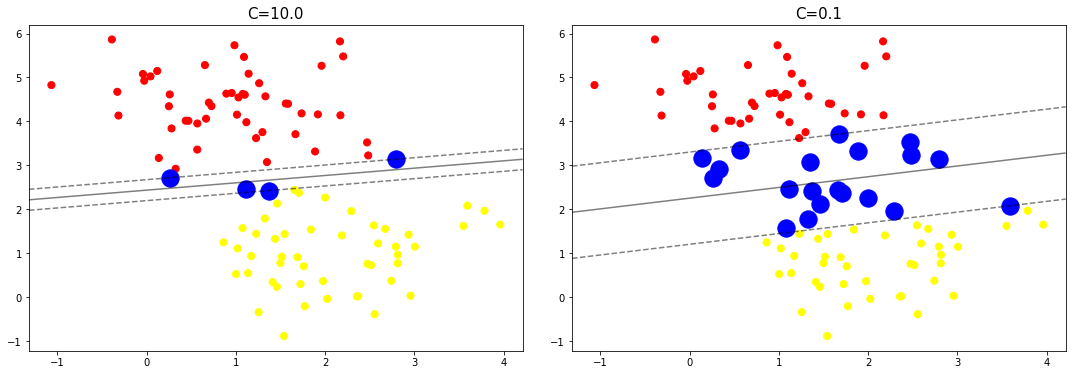

In [33]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.05,right=0.95,wspace=0.1)

for ax_i, C in zip(ax,[10.0,0.1]):
    model = SVC(kernel="linear",C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
    plt_svc(model,ax_i)
    ax_i.set_title(f"C={C:.1f}",size=15)